In [ ]:
pip install pydub

In [ ]:
pip install pysndfile

In [ ]:
pip install audiomentations

In [ ]:
pip install torchaudio

     |████████████████████████████████| 1.9MB 9.6MB/s 


In [ ]:
import numpy as np
import numpy
#import scipy.io.wavfile
#import scipy.signal
#from scipy import signal
import os
#import soundfile as sf
#import sys
#import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
#import librosa
from os import path
import seaborn as sns
#from pydub import AudioSegment
#import torch
#import torchaudio
#from pydub import AudioSegment
#from audiomentations import Compose, AddGaussianNoise, TimeStretch
from skimage.transform import rescale, resize, downscale_local_mean
import keras
from skimage import exposure
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers. normalization import BatchNormalization
from tensorflow.keras.utils import to_categorical
#from skimage import exposure
#from skimage.filters import threshold_otsu
from keras import backend as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
folder_path = '/content/drive/MyDrive/TFA/kaggle_data/'
data_save_path = '/content/drive/MyDrive/TFA/data_save/'

In [ ]:
birds_names = os.listdir(folder_path)

In [ ]:
birds_names

['rewbla',
 'mallar3',
 'redcro',
 'rucspa1',
 'sonspa',
 'swathr',
 'houwre',
 'spotow',
 'norcar',
 'rubpep1',
 'bewwre',
 'bcnher',
 'comrav',
 'carwre',
 'cubthr',
 'gbwwre1',
 'bncfly',
 'blujay',
 'houspa',
 'eursta',
 'banana',
 'barswa',
 'amerob']

In [ ]:
n_audios = []
for i in range(len(birds_names)):
  n_audios.append(len(os.listdir(folder_path+birds_names[i]+'/')))

data_mat_names = os.listdir(data_save_path)

In [ ]:
n_audios

[500,
 484,
 500,
 403,
 500,
 450,
 500,
 500,
 500,
 441,
 466,
 334,
 500,
 464,
 500,
 500,
 406,
 328,
 500,
 500,
 309,
 500,
 481]

In [ ]:
##for i in range(len(data_mat_names)):
#  print(np.load(data_save_path+data_mat_names[i]).shape)

#torch.cuda.is_available()
#K.tensorflow_backend._get_available_gpus()

In [ ]:
class_no=18
class0_data = np.load(data_save_path+'stft_'+str(class_no)+'.npy')
n_rows, n_cols = class0_data.shape[0], class0_data.shape[1]
n_samples = class0_data.shape[1]/n_audios[class_no]
print(n_samples)
n_samples = int(n_samples)

2668.0


In [ ]:
X_mat = []
for i in range(n_audios[class_no]):#could use log
  img = np.absolute(class0_data[:,i*n_samples:(i+1)*n_samples])[20:-30,:]
  img=img/np.max(img)
  image_resized = resize(img, (n_rows, 300),
                       anti_aliasing=True)
  image_resized = image_resized/np.max(image_resized)
  binary = np.zeros(image_resized.shape, dtype=np.float32)
  binary[image_resized > 0.04] =1
  X_mat.append(binary)

Text(0, 0.5, 'frequency bins')

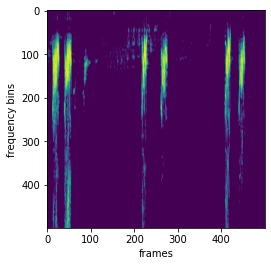

In [ ]:
img = np.absolute(class0_data[:,50*n_samples:(50+1)*n_samples])[20:-30,:]
img = img/np.max(img)
img = img[:,:1000]
image_resized = resize(img, (500, 500),
                       anti_aliasing=True)
img = image_resized/np.max(image_resized)
img = exposure.equalize_hist(img)
#plt.imshow(image_resized, vmax=1, vmin=0, cmap='gray')
#thresh = threshold_otsu(image_resized)
#binary = np.zeros(image_resized.shape, dtype=np.float32)
#binary[image_resized > 0.04] =1
plt.imshow(img)
plt.xlabel('frames')
plt.ylabel('frequency bins')
#plt.grid()

In [ ]:
#class0_data.shape[1]/500

2150.408

In [ ]:
np.save(data_save_path+'stft_image_300_'+str(class_no)+'.npy', X_mat)

In [ ]:
np.array(X_mat).shape

(481, 257, 300)

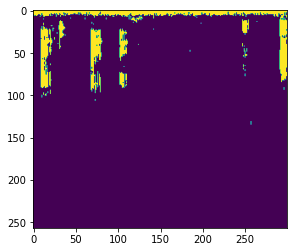

In [ ]:
plt.imshow(X_mat[0])

In [ ]:
X_all=[]
y_all=[]
n_test_classes = 9
for i in range(9,16):
  images = np.load(data_save_path+'stft_image_300_'+str(i)+'.npy', allow_pickle=True)
  #for j in range(images.shape[0]):
   # im = images[j,:,:]
    #images[j,:,:] = im/np.max(im)
  X_all=X_all+list(images)
  y_all=y_all+[i-9]*images.shape[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=99)

In [ ]:
rows_image, cols_image = X_train[0].shape[0], X_train[0].shape[1]

In [ ]:
X_train = np.array(X_train).reshape(-1, rows_image, cols_image, 1)
y_train = np.array(y_train)

In [ ]:
X_test = np.array(X_test).reshape(-1, rows_image, cols_image, 1)

In [ ]:
X_test.shape

(641, 257, 300, 1)

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[101]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(257, 300, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
'''model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))'''
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(7, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
np.save(data_save_path+'X_train_'+str(n_test_classes)+'.npy', X_train)

In [ ]:
np.save(data_save_path+'X_test_'+str(n_test_classes)+'.npy', X_test)

In [ ]:
np.save(data_save_path+'y_train_'+str(n_test_classes)+'.npy', y_train)

In [ ]:
np.save(data_save_path+'y_test_'+str(n_test_classes)+'.npy', y_test)

In [ ]:
#del X_train, X_test, y_train, y_test
X_train = np.load(data_save_path+'X_train_23.npy')
y_train = np.load(data_save_path+'y_train_23.npy')

In [ ]:
X_test = np.load(data_save_path+'X_test_23.npy')
y_test = np.load(data_save_path+'y_test_23.npy')

In [ ]:
#X_train.shape
X_test.shape

(641, 257, 300, 1)

In [ ]:
model.fit(X_train, y_train, batch_size = 20, epochs = 1, verbose = 1)

  1/129 [..............................] - ETA: 13s - loss: 0.1459 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


129/129 [==============================] - 11s 86ms/step - loss: 0.0798 - accuracy: 0.9836


In [ ]:
model.save(data_save_path+"model_23")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TFA/data_save/model_23/assets


In [ ]:
model = keras.models.load_model(data_save_path+"model_23")

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
np.argmax(y_test,axis=1).shape

(641,)

In [ ]:
accuracy = np.count_nonzero(y_pred==np.argmax(y_test,axis=1))*100/y_pred.shape[0]

In [ ]:
accuracy

56.3182527301092

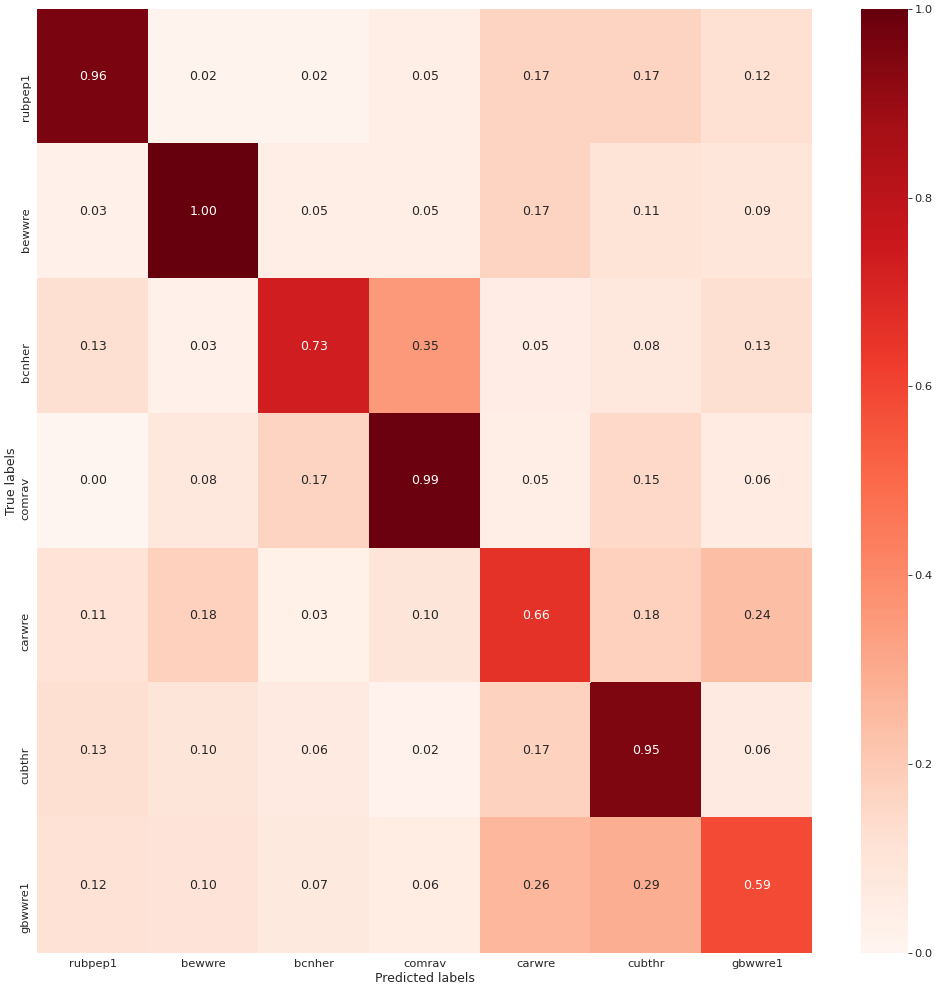

In [ ]:
cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred, normalize='true')
cm=cm/np.max(cm)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=birds_names)
#disp.plot()
my_dpi=50
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 25), dpi=my_dpi)
for i in range(1):
    #ax = axs[i]
    ax = plt.subplot()
    sns.set(font_scale=1.5)
    sns.heatmap(cm, annot=True,ax=ax, cmap="Reds", fmt=".2f", xticklabels=birds_names[9:16], yticklabels=birds_names[9:16])  #annot=True to annotate cells, ftm='g' to disable scientific notation
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
plt.savefig('confusion_mat_test.jpg')